In [5]:
#installs all the Necessary Libraries
!pip install folium seaborn scikit-learn
!pip install pandas
!pip install matplotlib

In [ ]:
#imports and loads all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans


In [ ]:
# Loads Dataset
#df.head() is used to load 1st five ROWS of the table
# Replace with full path if file is not in the same directory
df = pd.read_csv('ev-charging-stations-india (1).csv')
df.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [4]:
# Basic Information & Cleaning
print(df.info())
print(df.isnull().sum())
df['lattitude'] = df['lattitude'].astype(str).str.replace(',', '').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '').astype(float)
df_clean = df.dropna(subset=['lattitude', 'longitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB
None
name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64


In [12]:
import pandas as pd
df = pd.read_csv('ev-charging-stations-india (1).csv')

df.columns = df.columns.str.strip().str.lower()


df['lattitude'] = df['lattitude'].astype(str).str.replace(',', '').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '').astype(float)

# Drop missing values
df_clean = df.dropna(subset=['lattitude', 'longitude']).copy()

# Check result
print(df_clean[['name', 'lattitude', 'longitude']].head())

import folium

india_map = folium.Map(location=[22.5937, 78.9629], zoom_start=5)

for index, row in df_clean.iterrows():
    folium.CircleMarker(
        location=[row['lattitude'], row['longitude']],
        radius=2,
        popup=row['name'],
        fill=True,
        color='green',
        fill_opacity=0.7
    ).add_to(india_map)

india_map

                                                name  lattitude  longitude
0                 Neelkanth Star DC Charging Station    29.6019    76.9803
1                       Galleria DC Charging Station    28.4673    77.0818
2  Highway Xpress (Jaipur-Delhi) DC charging station    27.8751    76.2760
3                  Food Carnival DC Charging Station    29.3105    77.7218
4                  Food Carnival AC Charging Station    29.3105    77.7218


In [6]:
from folium.plugins import HeatMap
import folium

heat_data = [[row['lattitude'], row['longitude']] for index, row in df_clean.iterrows()]

heat_map = folium.Map(location=[22.9734, 78.6569], zoom_start=5)
HeatMap(heat_data).add_to(heat_map)

heat_map


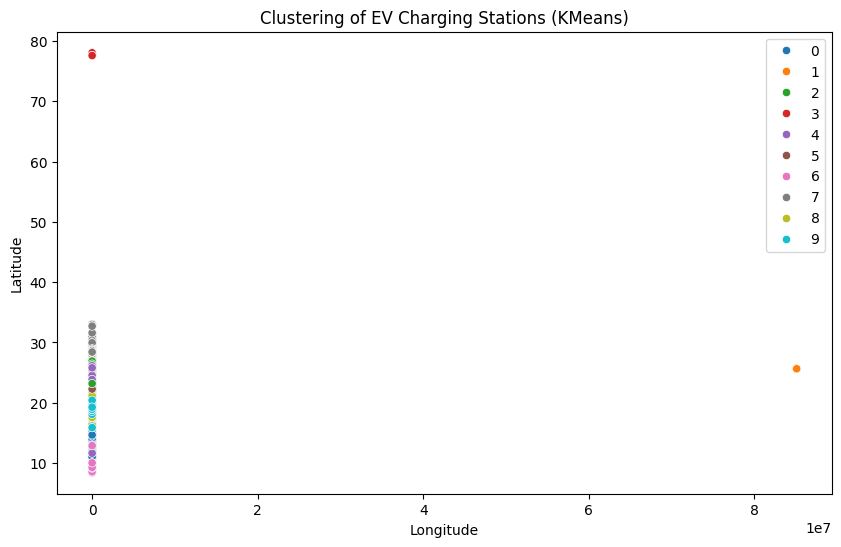

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Prepare data
X = df_clean[['lattitude', 'longitude']]

# Run KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='longitude', y='lattitude', hue='Cluster', palette='tab10')
plt.title('Clustering of EV Charging Stations (KMeans)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [8]:
from sklearn.cluster import KMeans

# Prepare data
X = df_clean[['lattitude', 'longitude']]

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)
# Get cluster centers (suggested locations)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['lattitude', 'longitude'])

print("Suggested locations (centroids):")
print(centroid_df)


Suggested locations (centroids):
   lattitude     longitude
0  12.869307  7.877113e+01
1  25.634199  8.510551e+07
2  26.565157  7.571009e+01
3  65.899559  1.605633e+01
4  22.897218  8.698720e+01
5  22.609024  7.299271e+01
6  10.800618  7.653875e+01
7  28.860107  7.735139e+01
8  17.690473  7.929474e+01
9  18.656670  7.357833e+01
